In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thai = pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\DATA SCIENCE-BARCELONA ACTIVA\SPRINT 8.- ALGORITMES D'APRENENTATGE NO SUPERVISAT-AGRUPACIO\Publicacions Facebook Thailandia.csv",
            sep =',')
thai

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# Per mirar nuls i Dtype

thai.info()

# Hi ha 4 columnes sense dades que s'han d'eliminar. La resta del dataset està complerta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
# Descripció de les variables numériques

thai.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [5]:
# Mirar variable no numerica status_id quina informació aporta
thai['status_id'].describe()

# La gran majoria són valors únics, pot donar poca informació per a l'agrupció. Com és una variable composta, miro de separar-la
# per si dona més informació.

count                                7050
unique                               6997
top       819700534875473_957599447752247
freq                                    2
Name: status_id, dtype: object

In [3]:
# # Separació en dos columnes com a dataframe (expand) i incorporació al dataframe inicial
thai[['status_id_1', 'status_id_2']] = thai['status_id'].str.split('_', n = 1, expand =True)

In [7]:
# Veure la primera columna
thai['status_id_1'].describe()

# Ara només hi ha 9 valors únics, per lo que seria possible categortizar

count                7050
unique                  9
top       246675545449582
freq                 2635
Name: status_id_1, dtype: object

In [8]:
thai['status_id_1'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
819700534875473      102
117059915488335       56
Name: status_id_1, dtype: int64

In [9]:
# Veure la segona columna
thai['status_id_2'].describe()

# D'aquí provenen els valors únics de la variable incial. Entenc que és una variable que no aporta informació relevant per
# a l'agrupació

count                7050
unique               6997
top       957599447752247
freq                    2
Name: status_id_2, dtype: object

In [10]:
# Miro la seguent variable categorica
thai['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [4]:
# Aquesta varible és object, però són dates. Com interessa que siguin números la separo directament i després el converteixo.
# Si estigues ja declarada com a datetime o m'interesses que les diferents columnes fossin datetime ho faria d'un altra manera 
# (ho indico més endavant per enrecordar-me del procediment però amb aquest dataset seria més llarg).

thai[['month', 'day','year','hour','minuts']] = thai['status_published'].str.split(r'[/ :]', n = 5, expand =True)


In [5]:
# Passo les multiples columnes a numeric i comprobo que estigui bé.

cols = ['month', 'day','year','hour','minuts']
thai[cols] = thai[cols].apply(pd.to_numeric, errors= 'coerce')
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
 16  status_id_1       7050 non-null   object 


In [13]:
# si hagues tingut ['status_published'] en datetime també hagués pogut separar les columnes d'aquesta manera, però seguirien sent
# type datetime. En aquest cas no m'interessa.

from datetime import datetime, timedelta

thai_time =thai.copy (deep = True)

thai_time['status_published'] = pd.to_datetime(thai_time['status_published'])

thai_time['Month'] = thai_time['status_published'].dt.month
thai_time['Year'] = thai_time['status_published'].dt.year
thai_time['Day'] = thai_time['status_published'].dt.day
thai_time['Hour'] = thai_time['status_published'].dt.hour
thai_time['Minuts'] = thai_time['status_published'].dt.minute


In [6]:
# Eliminar les columnes que no feien falta
columns_d =['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4','status_id_2']

thai = thai.drop(columns = columns_d)

thai

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_id_1,month,day,year,hour,minuts
0,video,529,512,262,432,92,3,1,1,0,246675545449582,4,22,2018,6,0
1,photo,150,0,0,150,0,0,0,0,0,246675545449582,4,21,2018,22,45
2,video,227,236,57,204,21,1,1,0,0,246675545449582,4,21,2018,6,17
3,photo,111,0,0,111,0,0,0,0,0,246675545449582,4,21,2018,2,29
4,photo,213,0,0,204,9,0,0,0,0,246675545449582,4,18,2018,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1050855161656896,9,24,2016,2,58
7046,photo,16,0,0,14,1,0,1,0,0,1050855161656896,9,23,2016,11,19
7047,photo,2,0,0,1,1,0,0,0,0,1050855161656896,9,21,2016,23,3
7048,photo,351,12,22,349,2,0,0,0,0,1050855161656896,9,20,2016,0,43


In [15]:
thai.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,month,day,year,hour,minuts
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,6.577730,15.792624,2016.382128,7.829504,27.528936
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,3.587108,8.728489,1.943176,6.886893,17.613119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2012.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,2016.000000,2.000000,12.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,16.000000,2017.000000,7.000000,26.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,23.000000,2018.000000,9.000000,43.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,12.000000,31.000000,2018.000000,23.000000,59.000000


In [16]:
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
 10  status_id_1    7050 non-null   object
 11  month          7050 non-null   int64 
 12  day            7050 non-null   int64 
 13  year           7050 non-null   int64 
 14  hour           7050 non-null   int64 
 15  minuts         7050 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 881.4+ KB


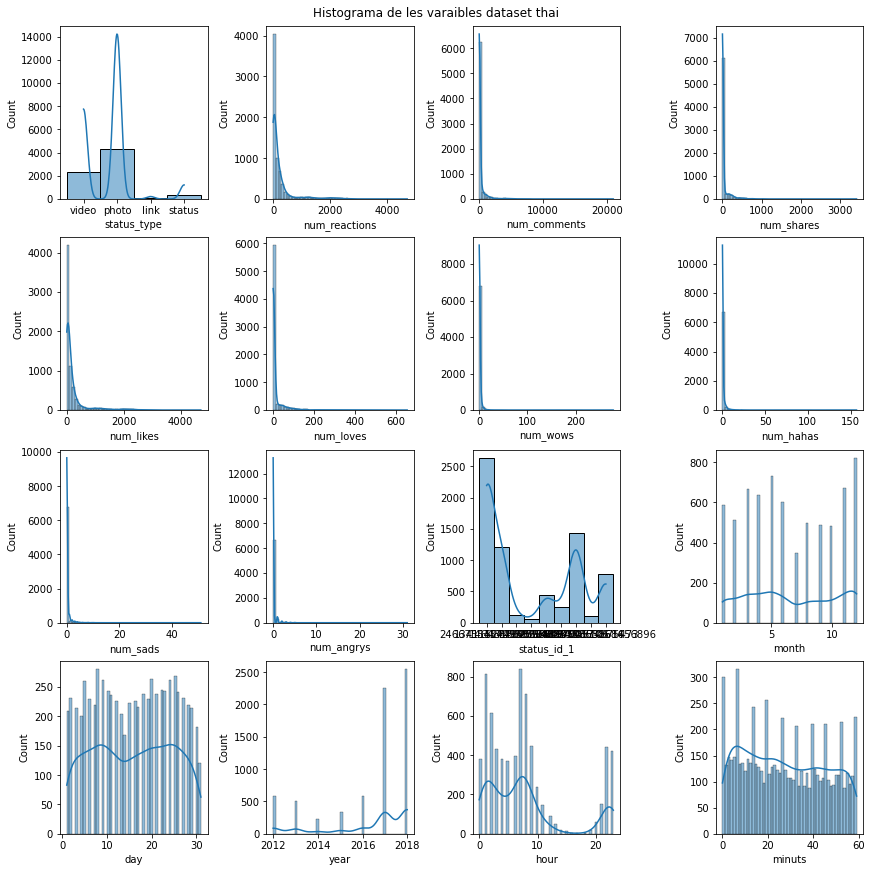

In [17]:
col=thai.columns

fig,axs =plt.subplots(4,4, figsize=(12,12),layout='constrained')
axs=axs.flat
fig.suptitle('Histograma de les varaibles dataset thai')

for count,elem in enumerate(col):
    sns.histplot(
        data = thai,
        x    = elem,
        bins = 50,
        kde  = True,
        ax   = axs[count])



In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder




In [19]:
# Preprocessar el dataset a la vegada, segons siguin columnes numeriques o categoriques

# Numeriques he escollit la normalització (he fet diverses proves anteriors amb diferents mètodes i no tinc clar que sigui la millor)
# perquè les variables raw no estan centrades
# Les columnes categoriques es pre processen amb OnHotEncoder (o dummy Encoder) per no donar-li més pes a cap de les categories
# que tenim i que es necessari per agrupar correctament.
# Es podria fer amb pd.get_dummies, però prefereixo fer-la amb sklearn per a integrar-la millor al procés

numeric_col = thai.select_dtypes(include=['int']).columns # pasar a llista les variables numeriques (només hi ha int al dataset)

cat_col= thai.select_dtypes(include=['object']).columns # pasar a llista les variables categoriques

preprocessor = ColumnTransformer(
                    [('Normal', Normalizer(), numeric_col),
                     ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_col)],
                    remainder = 'passthrough')



In [20]:
thai_pre = preprocessor.fit_transform(thai) # Aplicar el preprocessat

encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_col) # obtenir el nom de les variables categorique
#transformades. Les v. dummies es posen al final del dataset per ordre.

labels = np.concatenate([numeric_col, encoded_cat]) # v. numericque +  v.categoriques

thai_pre = pd.DataFrame(thai_pre, columns = labels) # pasar el dataset a pd per poder comprovar que tot estigui correcte

thai_pre


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,month,...,status_type_video,status_id_1_1050855161656896,status_id_1_117059915488335,status_id_1_134115277150304,status_id_1_146481362756646,status_id_1_246675545449582,status_id_1_614855718638584,status_id_1_725980084255106,status_id_1_819700534875473,status_id_1_848451358648417
0,0.239502,0.231805,0.118619,0.195586,0.041652,0.001358,0.000453,0.000453,0.0,0.001811,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.073897,0.000000,0.000000,0.073897,0.000000,0.000000,0.000000,0.000000,0.0,0.001971,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.110428,0.114806,0.027729,0.099239,0.010216,0.000486,0.000486,0.000000,0.0,0.001946,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.054831,0.000000,0.000000,0.054831,0.000000,0.000000,0.000000,0.000000,0.0,0.001976,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.104429,0.000000,0.000000,0.100017,0.004412,0.000000,0.000000,0.000000,0.0,0.001961,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.044039,0.000000,0.000000,0.044039,0.000000,0.000000,0.000000,0.000000,0.0,0.004453,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7046,0.007935,0.000000,0.000000,0.006943,0.000496,0.000000,0.000496,0.000000,0.0,0.004463,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7047,0.000992,0.000000,0.000000,0.000496,0.000496,0.000000,0.000000,0.000000,0.0,0.004464,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7048,0.169027,0.005779,0.010594,0.168064,0.000963,0.000000,0.000000,0.000000,0.0,0.004334,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Abans de fer el clustering, faré un PCA per veure si puc visualitzar les dades en 2D o fer més ràpid el clustering.

from sklearn.decomposition import PCA

pca_27 = PCA (n_components = 27) # Agafor el número màxim de variables del dataset

principal = pca_27.fit_transform(thai_pre)

np.cumsum(pca_27.explained_variance_ratio_*100)



array([ 34.57880409,  55.52869399,  68.81788358,  78.19217812,
        83.82894405,  88.73070028,  92.4806175 ,  94.50777304,
        96.01960444,  97.34153028,  98.36638557,  99.20239384,
        99.81657082,  99.94807837,  99.98707228,  99.99227466,
        99.99715537,  99.99840213,  99.99916776,  99.99960903,
        99.99981365,  99.99995116,  99.99999203,  99.99999998,
       100.        , 100.        , 100.        ])

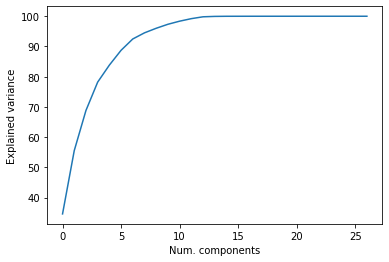

In [23]:
# Gràfic de la varianzça explicada
plt.plot(np.cumsum(pca_27.explained_variance_ratio_*100))
plt.xlabel ('Num. components')
plt.ylabel ('Explained variance')
plt.show()

# Amb 11 components es pot explicar el 98.36 % de la variança, per lo que pot servir per reduir la dimensió del dataset, però
# no serivrà per fer representació gràfica perquè només amb 2 o 3 components expliquem molt poc del dataset i no seria acurat.

In [24]:
pca_11 = PCA(n_components =11)

princ11 = pca_11.fit_transform(thai_pre)


In [25]:
# Si cal pasar-ho a dataframe

princ11_df = pd.DataFrame(data = princ11, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'
                                                    'PCA10', 'PCA11','PCA12']) 

## EXERCICI 1 i 3

In [26]:
# Clustering segons k-means

In [27]:
from sklearn.cluster import KMeans

# Primer he de veure el num. de clusters que es poden fer. Utilitaré el mètode Elbow
kmeans_kwargs = { 
        'init' :'random',
        'n_init' : 10,
        'max_iter' : 100,
        'random_state' : 42}

sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(princ11)
    sse.append(kmeans.inertia_)


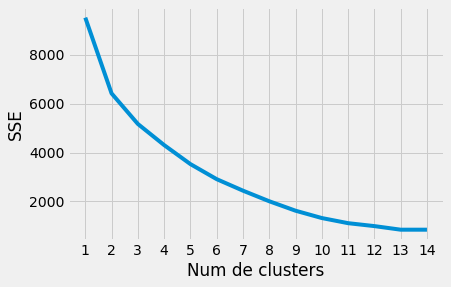

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,15), sse)
plt.xticks(range(1,15))
plt.xlabel ('Num de clusters')
plt.ylabel('SSE')
plt.show()

# la grafica indicaria 11 grups

In [29]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 15), sse, curve="convex", direction='decreasing')

kl.elbow

# S'escollirien 5 grups mitjançan aquest mètode. 

5

In [ ]:
# Per veure un altra mètode de determinar els clusters, podem utilitzar l'index Silhouette

valores_medios_silhouette_K = []
    
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(princ11)
    silhouette_avg = silhouette_score(princ11, kmeans.labels_)
    valores_medios_silhouette_K.append(silhouette_avg)

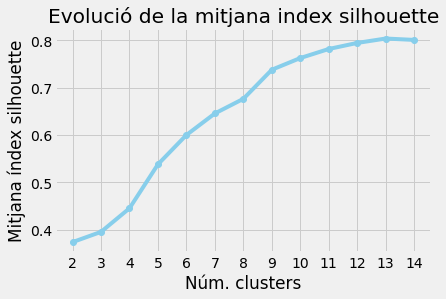

In [92]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.plot(range(2,15), valores_medios_silhouette_K, marker='o', color ='skyblue')


ax.set_title("Evolució de la mitjana index silhouette")
ax.set_xlabel('Núm. clusters')
ax.set_ylabel('Mitjana índex silhouette')
plt.xticks(range(2,15))


plt.show()

In [90]:
valores_medios_silhouette_K 

[0.3737969435431135,
 0.39542841469516854,
 0.44529777393098535,
 0.5381727354000598,
 0.6002209947145436,
 0.645786916774374,
 0.6766284218089191,
 0.7381697603072961,
 0.7628385902175151,
 0.7819903583831389,
 0.7948029802772123,
 0.8040758086084921,
 0.8011471795976064]

Amb això, ens indica que el millor número de cluesters és 12. Es recomana com més fiable aquest mètode per escollir el número de clusters,

In [93]:
# Passariem finalment l'algorisme pels 12 clusters escollits
kmeans = KMeans(n_clusters = 12, **kmeans_kwargs)

cluster_12= kmeans.fit(princ11)

kmeans.labels_

array([ 7, 11,  7, ...,  8,  8,  8])

In [94]:
# Per passar els valor al dataframe.
princ11_df['cluster'] = kmeans.labels_

## Exercici 2 i 3

In [32]:
# Clustering jerarquic

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [ ]:
# Provo a veure el número de clusters amb aquest mètode, provant diferents mètriques de linkage

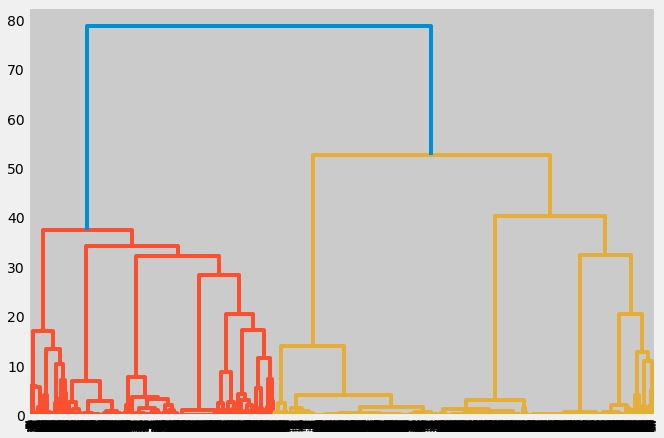

In [36]:
plt.figure(figsize=(10, 7))  

linkage_method_W = shc.linkage (princ11, method ='ward', metric ='euclidean')
dendo_W = shc.dendrogram(linkage_method_W)



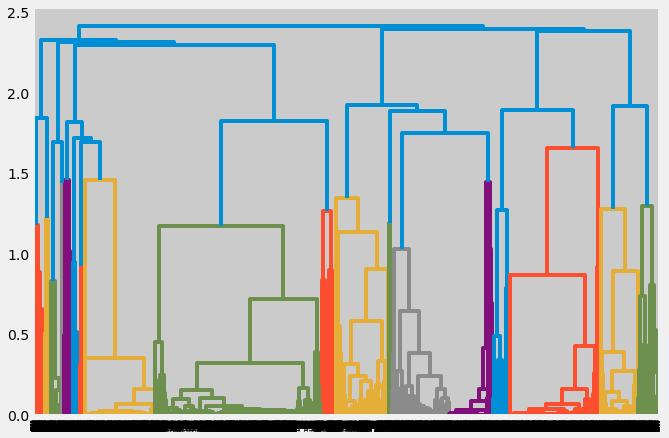

In [37]:
plt.figure(figsize=(10, 7))  

linkage_method_C = shc.linkage (princ11, method ='complete', metric ='euclidean')
dendo_C = shc.dendrogram(linkage_method_C)



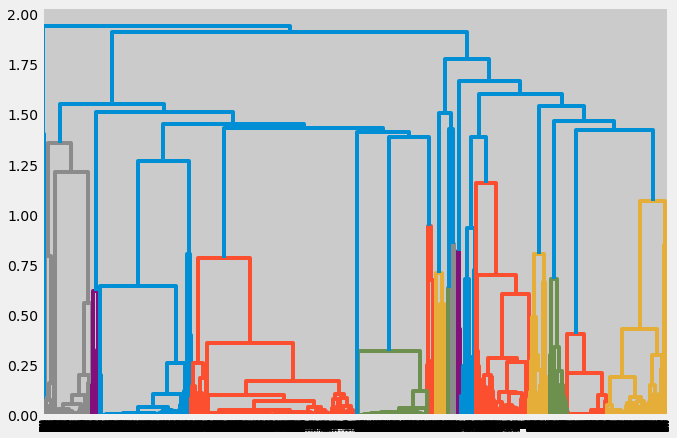

In [38]:
plt.figure(figsize=(10, 7))  

linkage_method_A = shc.linkage (princ11, method ='average', metric ='euclidean')
dendo_A = shc.dendrogram(linkage_method_A)

Surten num de clusters molt diferents en funció del mètode de linkage. Segons el mètode ward indica que hi ha dos clusters. Amb el linkage complete indica 7 grups. I amb el linkage average indica 3 grups. Dona resultats molt diferents, per lo que passo a veure si amb la avaluaciío Silhouette dona alguna pista millor.

In [95]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters )

    cluster_labels = modelo.fit_predict(princ11)
    silhouette_avg = silhouette_score(princ11, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    

valores_medios_silhouette_C = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'complete',
                    n_clusters = n_clusters)
    cluster_labels = modelo.fit_predict(princ11)
    silhouette_avg = silhouette_score(princ11, cluster_labels)
    valores_medios_silhouette_C.append(silhouette_avg)

valores_medios_silhouette_A = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'average',
                    n_clusters = n_clusters)
    cluster_labels = modelo.fit_predict(princ11)
    silhouette_avg = silhouette_score(princ11, cluster_labels)
    valores_medios_silhouette_A.append(silhouette_avg)
    
    


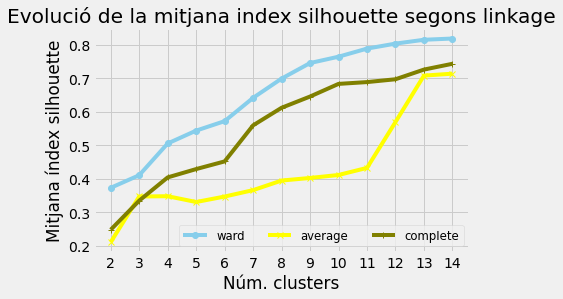

In [96]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.plot(range_n_clusters, valores_medios_silhouette, marker='o', color ='skyblue', label ='ward')
ax.plot(range_n_clusters, valores_medios_silhouette_A, marker='x', color ='yellow', label ='average')
ax.plot(range_n_clusters, valores_medios_silhouette_C, marker='+', color ='olive', label ='complete')

ax.set_title("Evolució de la mitjana index silhouette segons linkage")
ax.set_xlabel('Núm. clusters')
ax.set_ylabel('Mitjana índex silhouette')
plt.xticks(range(2,15))

plt.legend(fontsize ='small', ncol =3)

plt.show()

El index silhouette té valors entre -1 i +1, que indiquen:

1  : els clusters estan ben separats i es distingeixen clarament entre ells
0  : els clustes són indiferents o la distancia entre clusters es no significativa
-1 : els clusteres estan asignats erroriament

Per tant, clusters fets amb el linkage WARD presenten majors valors de l'index, el qual ens indica que seria la forma més apropiada de fer-ho. El que no correspon és que segons el mètode del dendograma, amb 2 clusters estaria bé. En canvi, mirant l'index Silhouette sembla que continua creixen mentre s'incrementa el numero de clusters.

In [97]:
valores_medios_silhouette 

[0.3733089066076199,
 0.41089576594651356,
 0.5057257738247368,
 0.544133179174855,
 0.5723946292419207,
 0.6419733549781357,
 0.6994655391098292,
 0.7459426556811563,
 0.7648744711705548,
 0.7890653379423113,
 0.8039940746985887,
 0.8154552314308092,
 0.8191605026985654]

Amb aquest mètode, també ens indica que el numero adient de clusters seria 12. I en comparació l'algortime k-means i AgglomerativeClustering tenen un resultat similar.